In [1]:
import neat
import os
import evogym.envs
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import numpy as np
import dill
import pickle as pkl
import sys
sys.path.append('../')

from hyperneat.hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net
from dynamic_env.traverser import DynamicObstacleTraverser
from dynamic_env.env_config import EnvConfig


import itertools as it
import time
import imageio

from matplotlib import pyplot as plt


from sgr.substrates import morph_substrate, control_substrate
from sgr.generate_robot import generate_robot, eval_robot_constraint
from sgr.evogym_sim import simulate_env
from sgr.body_speciation import CustomGenome
from grid_world.graph import Graph
from grid_world.node import Node
from grid_world.tasks import *
from copy import deepcopy
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
def get_robot(genome, neat_config, env, genome_type):
    if genome.robot is not None:
        robot = genome.robot
    else:
        cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)
        design_substrate = morph_substrate(5, genome_type)
        design_net = create_phenotype_network(cppn, design_substrate)
        robot = generate_robot(design_net, 5)
        
    if not eval_robot_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)
    
    env = evogym.envs.gym.make(env, body=robot, connections=connections)
    img = env.render(mode='img')
    env.close()
    return robot, img

In [3]:
with open(f"../island_cp/snk_3d/grid_gen_295.pkl", "rb") as file:
    grid: Graph = pkl.load(file)
genome_type = grid.params.substrate_type
CustomGenome.robot_func = lambda self, net, config: generate_robot(net, grid.d_nodes["0"].sgr_pop.robot_size)
CustomGenome.substrate = morph_substrate(grid.d_nodes["0"].sgr_pop.robot_size, genome_type)
CustomGenome.robot_size = grid.d_nodes["0"].sgr_pop.robot_size
CustomGenome.spec_genotype_weight =  grid.params.spec_genotype_weight
CustomGenome.spec_phenotype_weight = grid.params.spec_phenotype_weight

ObstacleTraverser-v0 437 1.04	ObstacleTraverser-v0 1177 2.43	ObstacleTraverser-v0 437 1.04	ObstacleTraverser-v0 437 1.04	ObstacleTraverser-v0 763 1.48	ObstacleTraverser-v0 763 1.48	
ObstacleTraverser-v0 437 1.04	ObstacleTraverser-v1 1019 4.67	ObstacleTraverser-v1 1019 4.67	ObstacleTraverser-v1 1019 4.67	ObstacleTraverser-v1 1019 4.67	ObstacleTraverser-v0 763 1.48	
ObstacleTraverser-v0 437 1.04	ObstacleTraverser-v1 1019 4.67	ObstacleTraverser-v0 1336 1.08	ObstacleTraverser-v0 443 1.06	ObstacleTraverser-v1 1019 4.67	ObstacleTraverser-v0 763 1.48	
ObstacleTraverser-v0 1183 0.57	ObstacleTraverser-v1 234 3.27	ObstacleTraverser-v0 1364 2.09	ObstacleTraverser-v0 443 1.06	ObstacleTraverser-v1 1019 4.67	ObstacleTraverser-v0 1098 2.14	
ObstacleTraverser-v0 1255 1.0	ObstacleTraverser-v1 1364 2.09	ObstacleTraverser-v1 1321 0.54	ObstacleTraverser-v1 1019 4.67	ObstacleTraverser-v1 1330 -0.05	ObstacleTraverser-v0 1098 2.14	
ObstacleTraverser-v0 1098 2.14	ObstacleTraverser-v0 1098 2.14	ObstacleTravers

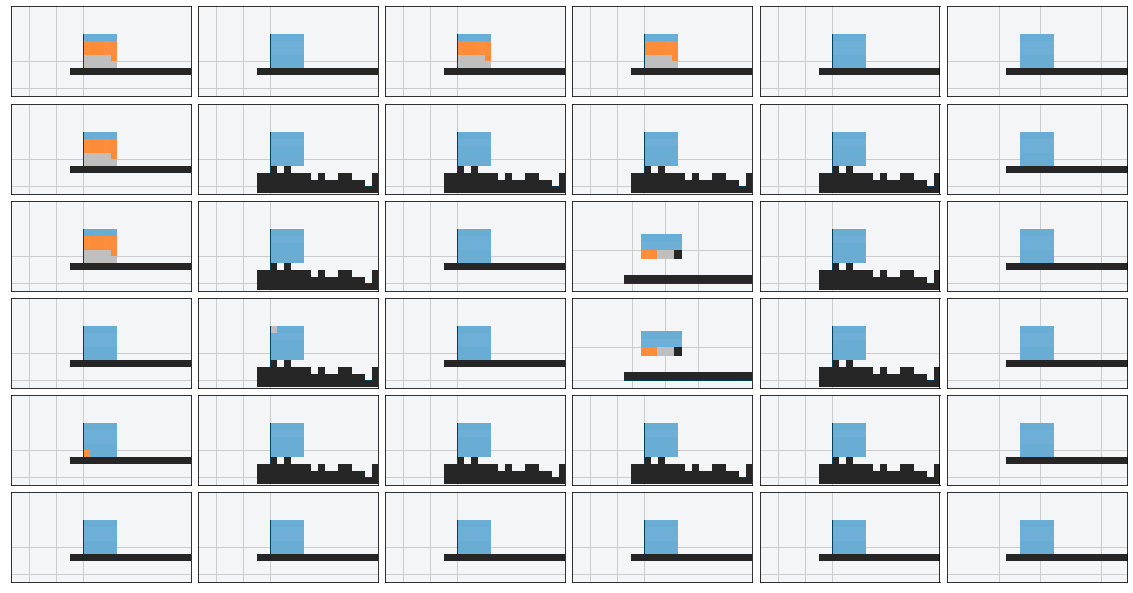

In [4]:
n_rows=6
n_cols=6

fig = plt.figure(1,(20,20))
grid_img = ImageGrid(fig, 111,
                 nrows_ncols=(n_rows,n_cols),
                 axes_pad=0.1,
                 share_all=True
                 )

grid_img[0].get_yaxis().set_ticks([])
grid_img[0].get_xaxis().set_ticks([])
cont = 0
for key, value in grid.d_nodes.items():
    best_genome = None
    best_genome_fit = -100000
    for g in value.sgr_pop.pop.population.values():
        # print(g.key, g.fitness)
        if g.fitness != None and g.fitness > best_genome_fit:
            best_genome = g
            best_genome_fit = g.fitness
    # best_genome = value.sgr_pop.best_genome
    fit = np.round(best_genome_fit, 2)
    print(f"{value.task} {best_genome.key} {fit}", end="\t")
    if cont%n_cols==n_cols-1:
        print()
    
    robot, img = get_robot(best_genome, value.sgr_pop.neat_config, value.task, genome_type) 
    if img is not None:
        # print(ag.robot)
        aux = Image.fromarray(img, 'RGB')
        # display(aux.resize((aux.size[0]//3, aux.size[1]//3)))
        grid_img[cont].imshow(aux,interpolation='none')
    cont += 1

In [5]:
grid.d_nodes["0"].sgr_pop.best_genome.key
grid.d_historical[20].__dict__

{'id': 20, 'pop_id': 3, 'parent_1': -1, 'parent_2': -1}

In [ ]:
grid.d_nodes["1"].sgr_pop.single_genome_fit(
    genome = grid.d_nodes["2"].sgr_pop.pop.population[454],
    n_steps = 600,
    env_name="UpStepper-v0",
    get_env_obs=None,
    dynamic_env_config=None,
    render=True, 
    save_gif=None,
)

In [7]:
grid.d_nodes["1"].sgr_pop.pop.population

{437: <sgr.body_speciation.CustomGenome at 0x7fbcbcc84390>,
 454: <sgr.body_speciation.CustomGenome at 0x7fbcbd6f47d0>,
 1177: <sgr.body_speciation.CustomGenome at 0x7fbcbcc080d0>,
 1178: <sgr.body_speciation.CustomGenome at 0x7fbcbcc08c10>,
 1179: <sgr.body_speciation.CustomGenome at 0x7fbcbcc18850>,
 1180: <sgr.body_speciation.CustomGenome at 0x7fbcbcc1f4d0>}

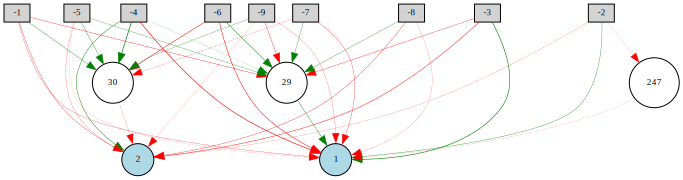

In [41]:
genome = grid.d_nodes["1"].sgr_pop.pop.population[12031]
cppn = neat.nn.FeedForwardNetwork.create(genome, grid.d_nodes["1"].sgr_pop.pop.config)
draw_net(cppn)